<a id="top"></a>

# Comparing Spectral Types with JWST Data

***

# Learning Goals

By the end of this tutorial, you will:

- Be able to extract data for multiple targets that meet `SpectralDB` search criteria.
- Become familiar with cross-referencing outputs with `SpectralDB` against `astroquery` catalogs.
- Plot multiple spectra against one another and qualitatively verify features by eye.

# Introduction
[Note: how much to introduce given other spectralDB notebook?]

In this tutorial, we will leverage the unique capabilities of `SpectralDB` to search directly on wavelength, querying across observations to compare the spectra of different stellar types.

This notebook builds on [link previously written SpectralDB notebook].

# Imports

- *matplotlib* to visualize the downloaded JWST data.
- *sys* to report our Python version.
- *requests* to interact with the SpectralDB API.
- *numpy* to rework the downloaded JWST data.
- *astroquery* to cross-reference our stars.

In [101]:
import matplotlib.pyplot as plt
import requests
import sys
import numpy as np

from astroquery.simbad import Simbad

# Main Contents

## Collating targets

Let's first submit a request via the `SpectralDB` API. As discussed in [link other notebook], these requests can be made over flux and wavelength. There are a number of molecular features blueward of 2 microns, so let's set our wavelength range from 0 to 2 microns.

In [102]:
wav_range = '0,2'

As demonstrated in [link other notebook], these conditions will be passed to the `SpectralDB` request as strings. Ranges are represented as comma-separated values, as above.

To make some minimum quality cut on our observations (and reduce the time to query our observations), we'll also enforce that our observations have a minimum of 1 Jansky.

In [103]:
min_flux = '1'

We can now submit our request, starting with the `base_url` upon which `SpectralDB` requests are constructed:

In [104]:
base_url = 'https://mast.stsci.edu/spectra/api/v0.1/search'


Now we create our dictionary of conditions. Note that the syntax for requesting a quantity above some minimum value in `SpectralDB` is `[quantity].gt: min_value`.

In [105]:
conditions = {'flux.gt': min_flux, 'wavelength': '0,2'}

With the `conditions` and `base_url` set, we can submit and read in our request.

In [106]:
# submit the request
response = requests.post(base_url, json={'conditions': conditions,
                             'columns': ['targetName']})

# turn the response into a readable dictionary
response_data = response.json()

`response_data` is now a Python `dict` that we can parse to access the data we'd like. Let's take a look at the value of the `results` key.

In [107]:
response_data['results']

[{'fileName': 'jw01335-o008_t007_nirspec_g235h-f170lp_x1d.fits',
  'x': 0,
  'y': None,
  'wavelength': 1.7000162548746123,
  'flux': 27796.605489378333,
  'targetName': 'SDSSJ1652+1728'},
 {'fileName': 'jw01335-o008_t007_nirspec_g235h-f170lp_x1d.fits',
  'x': 1,
  'y': None,
  'wavelength': 1.7004122548631533,
  'flux': 33770.014175515236,
  'targetName': 'SDSSJ1652+1728'},
 {'fileName': 'jw01335-o008_t007_nirspec_g235h-f170lp_x1d.fits',
  'x': 2,
  'y': None,
  'wavelength': 1.7008082548516943,
  'flux': 35863.02425664866,
  'targetName': 'SDSSJ1652+1728'},
 {'fileName': 'jw01335-o008_t007_nirspec_g235h-f170lp_x1d.fits',
  'x': 3,
  'y': None,
  'wavelength': 1.7012042548402353,
  'flux': 40041.22161376637,
  'targetName': 'SDSSJ1652+1728'},
 {'fileName': 'jw01335-o008_t007_nirspec_g235h-f170lp_x1d.fits',
  'x': 4,
  'y': None,
  'wavelength': 1.7016002548287763,
  'flux': 44124.447498458896,
  'targetName': 'SDSSJ1652+1728'},
 {'fileName': 'jw01335-o008_t007_nirspec_g235h-f170lp_x1d

The response of the request returned the fileneame of the data, the average wavelength of the observation, the average flux of the observation, and the name of the target name observed [what are x and y?].

Next, we can parse through these results to construct a list of unique target names. We'll ignore blank target names.

In [108]:
names = []
for d in response_data['results']:
    name = d['targetName']
    if name != '':
        names += [name]
    
print(np.unique(names))

['10 Hygiea' '2MASS J12560183-1257276' '2MASS J16194609+5534178'
 '2MASS J17430448+6655015' '2MASS J17540383-2810466' 'BD+04 3653'
 'GCRV 21765' 'GSPC P330-E' 'HWK-I 74230' 'IRAS 05248-7007' 'JUPITER'
 'Kopff' 'NGC 2070 S7B' 'NGC 7469' 'SDSSJ1652+1728' 'SDSSJ1723+3411'
 'TYC 3986-834-1' 'TYC 4433-1800-1' 'VV114']


These targets span a number of different catalogs. We can use `astroquery`'s functionality to check the spectral type of each object, if it is a star.

First, we instantiate a `Simbad` object and make sure that the spectral type is reported in its queries.

In [109]:
customSimbad = Simbad()
customSimbad.add_votable_fields('sptype')

Next, we iterate through the objects and report out their stellar types. [note: pause the warnings below?]

In [110]:
for name in np.unique(names):
    
    # query the object
    result = customSimbad.query_object(name)
    
    # ignore this object if no result is returned
    if not result:
        continue
        
    spectral_type = result['SP_TYPE'][0]
    
    # ignore this object if it has no spectral type
    if spectral_type == '':
        continue
        
    print(name, spectral_type)

2MASS J12560183-1257276 L8.0
2MASS J16194609+5534178 G0-5
2MASS J17430448+6655015 A5V
2MASS J17540383-2810466 M4.5III
BD+04 3653 K5III
GCRV 21765 A0
GSPC P330-E G2V
TYC 3986-834-1 K0III
TYC 4433-1800-1 A3V


/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '10 Hygiea' this identifier has an incorrect format for catalog: 	* : star name
  warnings.warn("Warning: The script line number %i raised "
/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'HWK-I 74230': No known catalog could be found
  warnings.warn("Warning: The script line number %i raised "
/Users/arjunsavel/opt/miniconda3/envs/uhj_magnet/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'JUPITER': No known catalog could be found
  warnings.warn("W

It seems that our sample of targets includes a K star (BD+04 3653) and a G star (GSPC P330-E). Their spectra should be different; K dwarfs, for instance, should have more pronounced molecular features than G dwarfs.

## Downloading spectra

To start, we extract the unique target names for the K star from our `response_data`.

In [111]:
targetname = 'BD+04 3653'

targetfiles = []

for d in response_data['results']:
    if d['targetName'] == targetname:
        targetfiles += [d['fileName']]


In [112]:
np.unique(targetfiles)

array(['jw01364-o003_t003_nirspec_g235h-f170lp_x1d.fits'], dtype='<U47')

Our HTTP request requires a header, which can be constructed as a `dict`.

In [113]:
# retrieve our system's Python version for the request. 
version = ".".join(map(str, sys.version_info[:3]))
# create HTTP Header Variables
headers = {"Content-type": "application/x-www-form-urlencoded",
           "Accept": "text/plain",
           "User-agent":"python-requests/"+version}

Next, we make our request with the target file.

In [114]:
targetfile = np.unique(targetfiles)[0]

request_url=f'https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename={targetfile}'    

# perform the HTTP request
spectrum_response = requests.get(request_url, headers=headers)

spectrum_object = spectrum_response.json()

print(spectrum_object['message'])

Successfully found data for jw01364-o003_t003_nirspec_g235h-f170lp_x1d.fits


We can now unpack our successfully downloaded spectrum.

In [115]:
k_star_wav = np.array(spectrum_object['data']['wavelength'])

k_star_flux = np.array(spectrum_object['data']['flux'])
k_star_flux_err = np.array(spectrum_object['data']['fluxErr'])

Some light data-cleaning below next ensures that each individual data point has at least a SNR of 0.5.

In [116]:
k_star_flux_masked = k_star_flux[k_star_flux_err/k_star_flux < 2]
k_star_flux_err_masked = k_star_flux_err[k_star_flux_err/k_star_flux < 2]
k_star_wav_masked = k_star_wav[k_star_flux_err/k_star_flux < 2]


As a last step for this star, we properly transform its error into log space.

In [117]:
k_star_log_err = (1/np.log(10)) * k_star_flux_err_masked/k_star_flux_masked

We now repeat the above steps for the G star target.

In [118]:
# access target files for G star

targetname = 'GSPC P330-E'

targetfiles = []

for d in response_data['results']:
    if d['targetName'] == targetname:
        targetfiles += [d['fileName']]


In [162]:
np.unique(targetfiles)

array(['jw01538-o062_t002_nirspec_g140h-f100lp_x1d.fits',
       'jw01538-o062_t002_nirspec_g140m-f100lp_x1d.fits',
       'jw01538-o062_t002_nirspec_g235h-f170lp_x1d.fits',
       'jw01538-o062_t002_nirspec_g235m-f170lp_x1d.fits'], dtype='<U47')

This time, there are multiple files that we can download. Let's pick the third file, as it observed with the same grating as the K star observation (G235H).

In [154]:
# download first target file
targetfile = np.unique(targetfiles)[2]

request_url=f'https://mast.stsci.edu/spectra/api/v0.1/retrieve?filename={targetfile}'    

# perform the HTTP request
spectrum_response = requests.get(request_url, headers=headers)

spectrum_object = spectrum_response.json()

print(spectrum_object['message'])

Successfully found data for jw01538-o062_t002_nirspec_g235h-f170lp_x1d.fits


In [155]:
# extract G star spectrum components

g_star_wav = np.array(spectrum_object['data']['wavelength'])

g_star_flux = np.array(spectrum_object['data']['flux'])
g_star_flux_err = np.array(spectrum_object['data']['fluxErr'])

In [156]:
# remove noisy G star spectral data
g_star_flux_masked = g_star_flux[g_star_flux_err/g_star_flux < 1]
g_star_flux_err_masked = g_star_flux_err[g_star_flux_err/g_star_flux < 1]
g_star_wav_masked = g_star_wav[g_star_flux_err/g_star_flux < 1]

# transform G star spectral data into log space
g_star_log_err = (1/np.log(10)) * g_star_flux_err_masked/g_star_flux_masked

With all of our data downloaded and cleaned, we can finally plot the results!

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_39344/917986835.py:2: RuntimeWarning: invalid value encountered in log10
  markers, caps, bars = plt.errorbar(k_star_wav_masked, np.log10(k_star_flux_masked),


Text(0, 0.5, 'Log10 Flux (Jy)')

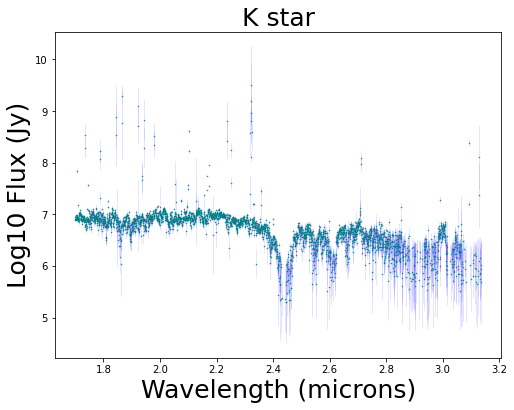

In [157]:
plt.figure(figsize=(8,6))
markers, caps, bars = plt.errorbar(k_star_wav_masked, np.log10(k_star_flux_masked), 
             yerr=k_star_log_err, 
             color='teal',
             fmt='.',
            ms=1,
            elinewidth=1,
            ecolor='blue')

[bar.set_alpha(0.1) for bar in bars]
[cap.set_alpha(0.1) for cap in caps]


plt.title('K star', fontsize=25)

plt.xlabel('Wavelength (microns)', fontsize=25)

plt.ylabel('Log10 Flux (Jy)', fontsize=25)

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_39344/480626688.py:2: RuntimeWarning: invalid value encountered in log10
  markers, caps, bars = plt.errorbar(g_star_wav_masked, np.log10(g_star_flux_masked),


Text(0, 0.5, 'Log10 Flux (Jy)')

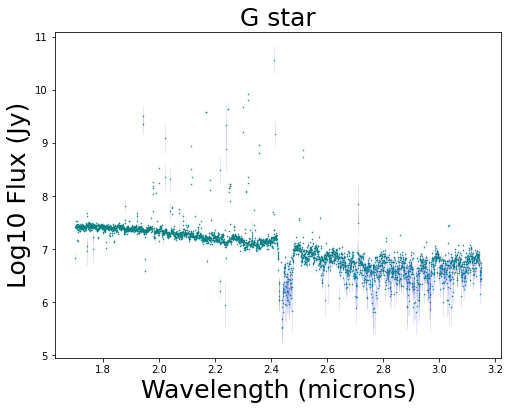

In [158]:
plt.figure(figsize=(8,6))
markers, caps, bars = plt.errorbar(g_star_wav_masked, np.log10(g_star_flux_masked), 
             yerr=(1/np.log(10)) * g_star_flux_err_masked/g_star_flux_masked, 
             color='teal',
             fmt='.',
            ms=1,
            elinewidth=1,
            ecolor='blue')

[bar.set_alpha(0.1) for bar in bars]
[cap.set_alpha(0.1) for cap in caps]

plt.title('G star', fontsize=25)

plt.xlabel('Wavelength (microns)', fontsize=25)

plt.ylabel('Log10 Flux (Jy)', fontsize=25)

Showing both spectra in the same plot will make the spectral differences more distinct.

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_39344/793803733.py:4: RuntimeWarning: invalid value encountered in log10
  markers, caps, bars = plt.errorbar(k_star_wav_masked, np.log10(k_star_flux_masked),
/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_39344/793803733.py:17: RuntimeWarning: invalid value encountered in log10
  markers, caps, bars = plt.errorbar(g_star_wav_masked, np.log10(g_star_flux_masked),


Text(0, 0.5, 'Log10 Flux (Jy)')

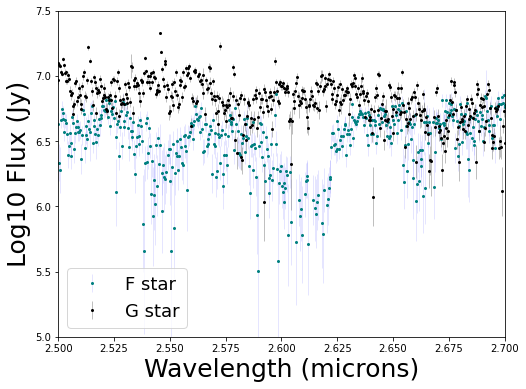

In [161]:
plt.figure(figsize=(8,6))


markers, caps, bars = plt.errorbar(k_star_wav_masked, np.log10(k_star_flux_masked), 
             yerr=(1/np.log(10)) * k_star_flux_err_masked/k_star_flux_masked, 
             color='teal',
             fmt='.',
            ms=4,
            elinewidth=1,
            ecolor='blue', label='F star')

[bar.set_alpha(0.1) for bar in bars]
[cap.set_alpha(0.1) for cap in caps]



markers, caps, bars = plt.errorbar(g_star_wav_masked, np.log10(g_star_flux_masked), 
             yerr=(1/np.log(10)) * g_star_flux_err_masked/g_star_flux_masked, 
             color='black',
             fmt='.',
            ms=4,
            elinewidth=1,
            ecolor='gray',
                                  label='G star')

[bar.set_alpha(0.5) for bar in bars]
[cap.set_alpha(0.5) for cap in caps]

# plt.scatter(wav, flux)

# plt.yscale('log')
plt.ylim(5,7.5)
plt.xlim(2.5, 2.7) 

plt.legend(fontsize=18)
plt.xlabel('Wavelength (microns)', fontsize=25)

plt.ylabel('Log10 Flux (Jy)', fontsize=25)

As expected, the F star has stronger spectral features than the G star.

# Exercises
- Compare an A star spectrum to a G star spectrum. How do the spectral features differ? Do they differ in expected ways?
- Find observations of Jupiter's emission spectrum over a wide wavelength range (e.g., 1 to 15 micron). Some spectral features are obvious by eye; what are they?

# Additional Resources
- [Classification of stellar spectra](http://www.star.ucl.ac.uk/~pac/spectral_classification.html) 
- [JWST home page](https://webb.nasa.gov/)
- [NIRSPEC filters and gratings](https://jwst-docs.stsci.edu/jwst-near-infrared-spectrograph/nirspec-instrumentation/nirspec-dispersers-and-filters)

# About this Notebook

**Author**: Arjun B. Savel (asavel@umd.edu).

**Last updated**: 2022-09-22

# Citations
If you use `astroquery`, `matplotlib`, or `numpy` for published research, please cite the authors. Follow these links for more information about citing `astoquery`, `matplotlib`, and `numpy`:

* [Citing `astroqery`](https://github.com/astropy/astroquery/blob/main/astroquery/CITATION)
* [Citing `matplotlib`](https://matplotlib.org/stable/users/project/citing.html)
* [Citing `numpy`](https://numpy.org/citing-numpy/)

[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>
